In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#load data
df = pd.read_excel("2020W3.xlsx", sheet_name='Sheet2')

#select only years with male/female split and reduce details
df = df[df["Age bracket"].isin(['4-10 years', '11-18 years', '19-64 years','65 years and over', ])]

#reorganise dataframe
df = pd.melt(df, id_vars=["Age bracket", "Group", "Gender"], var_name="Year", value_name="Percent")

In [49]:
df.head()

,Age bracket,Group,Gender,Year,Percent
0,4-10 years,Children,All,(2008/09 - 2009/10),14.7
1,4-10 years,Children,Male,(2008/09 - 2009/10),14.8
2,4-10 years,Children,Female,(2008/09 - 2009/10),14.6
3,11-18 years,Children,All,(2008/09 - 2009/10),15.9
4,11-18 years,Children,Male,(2008/09 - 2009/10),16.2


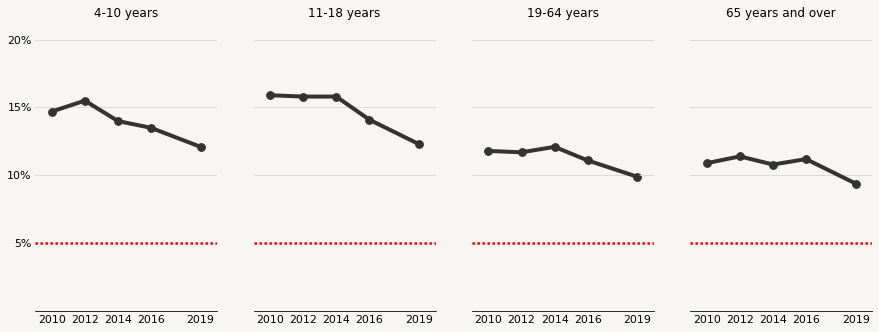

In [136]:
gender = ["All", "Female", "Male"]
cols = {"All": "#333333", "Female": "orange", "Male": "blue", "benchmark": "red"}
date_names = [2010, 2012, 2014, 2016, 2019]

# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(15,5))
fig.set_facecolor("#f7f6f4")



# =======
#plot data for each age bracket
num=0
for i in df["Age bracket"].unique():
    num+=1
    plt.subplot(1,4,num)
    
    ####plot data
    #all
    plt.plot(date_names, df[(df["Age bracket"]==i) & (df["Gender"]==group[0])]["Percent"],
            linewidth=4, color=cols[group[0]])
    plt.scatter(date_names, df[(df["Age bracket"]==i) & (df["Gender"]==group[0])]["Percent"],
            s=60, color=cols[group[0]])

    
    #remove grid
    for pos in ['right', 'top',  'left']:
        plt.gca().spines[pos].set_visible(False)
    plt.gca().set_facecolor("#f7f6f4")
    
    #x-axis
    plt.xticks([2009,2010, 2012, 2014, 2016, 2019], ["",2010, 2012, 2014, 2016, 2019])
    plt.gca().set_xlim(xmin=2009, xmax=2020)
    
    #yaxis
    plt.gca().set_ylim(ymin=0, ymax=20)
    if num==1:
        plt.yticks([5,10,15,20])
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
    else:
        plt.yticks([5,10,15,20], ["", "", "", ""])
    plt.grid(visible=True, axis='y', zorder=1, color = "#D3D3D3")
    
    plt.tick_params(axis='both', length = 0, color = "#444444", labelsize=11)
    
    
    #recommended intake line
    plt.plot([2009, 2020], [5,5],linestyle= (0,(1, 1)), linewidth=2.5, color=cols["benchmark"])
    
    #title
    plt.title(i, y=1.06,ha='center', fontsize=12)


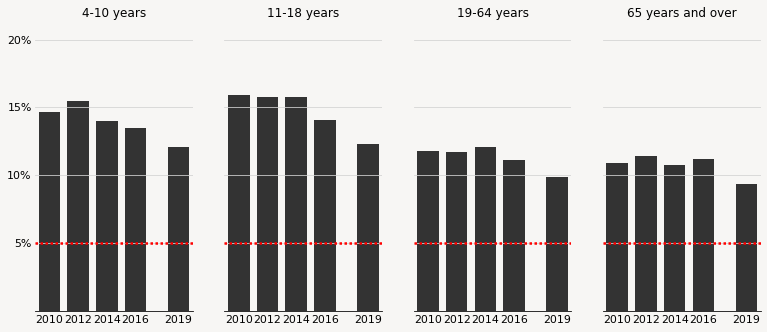

In [146]:
gender = ["All", "Female", "Male"]
cols = {"All": "#333333", "Female": "orange", "Male": "blue", "benchmark": "red"}
date_names = [2010, 2012, 2014, 2016, 2019]

# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(13,5))
fig.set_facecolor("#f7f6f4")



# =======
#plot data for each age bracket
num=0
for i in df["Age bracket"].unique():
    num+=1
    plt.subplot(1,4,num)
    
    ####plot data
    #all
    plt.bar(date_names, df[(df["Age bracket"]==i) & (df["Gender"]==group[0])]["Percent"],
            color=cols[group[0]], width=1.5)
    
    #remove grid
    for pos in ['right', 'top',  'left']:
        plt.gca().spines[pos].set_visible(False)
    plt.gca().set_facecolor("#f7f6f4")
    
    #x-axis
    plt.xticks([2009,2010, 2012, 2014, 2016, 2019], ["",2010, 2012, 2014, 2016, 2019])
    plt.gca().set_xlim(xmin=2009, xmax=2020)
    
    #yaxis
    plt.gca().set_ylim(ymin=0, ymax=20)
    if num==1:
        plt.yticks([5,10,15,20])
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
    else:
        plt.yticks([5,10,15,20], ["", "", "", ""])
    plt.grid(visible=True, axis='y', zorder=1, color = "#D3D3D3")
    
    plt.tick_params(axis='both', length = 0, color = "#444444", labelsize=11)
    
    
    #recommended intake line
    plt.plot([2009, 2020], [5,5],linestyle= (0,(1, 1)), linewidth=2.5, color=cols["benchmark"])
    
    #title
    plt.title(i, y=1.06,ha='center', fontsize=12)


In [13]:
#function to draw arrows
def draw_arrow(plt, arr_start, arr_end):
       dx = arr_end[0] - arr_start[0]
       dy = arr_end[1] - arr_start[1]
       plt.arrow(arr_start[0], arr_start[1], dx, dy,
                 head_width=1, head_length=1, length_includes_head=True, color='black')

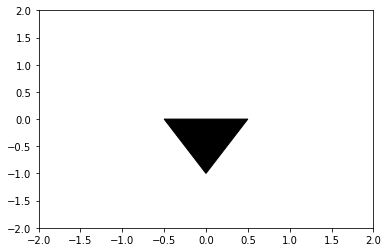

In [18]:
plt.xlim(-2,2)
plt.ylim(-2,2)
draw_arrow(plt, [0,0], [0,-1])
plt.show()